# Cancer In Men - Prostate
### By : Rohan Anand Shetty
One of the most prevalent cancers that affects males is prostate cancer. The prostate gland, a tiny, walnut-shaped gland that makes the seminal fluid that feeds and carries sperm, develops a cancerous tumor in it. The likelihood of acquiring prostate cancer is increased by a number of risk factors, despite the fact that the precise causes of this disease are not entirely understood..

Although the precise causes of prostate cancer are not yet entirely known, there are a number of risk factors that can raise the likelihood of getting the disease. When determining a person's risk for prostate cancer, it's crucial to take into account their age, family history, race, and environmental factors. Men should discuss their risk factors with their healthcare practitioner and get routine prostate cancer screenings because early detection and treatment are essential for improving outcomes for men with this disease.

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### The Data 
The data is resourced from kaggle and its coloumns are radius, texture, perimeter, area, smoothness, compactness, symmetry, and fractal dimension of a tumor, which can all be important factors in the diagnosis and treatment of prostate cancer in men.

* Radius denotes the size of the tumor, which may be a sign of the cancer's stage and severity. Bigger tumors are frequently harder to treat and can necessitate more invasive treatments like radiation or surgery.

* Texture, which describes how tumor cells appear under a microscope, can aid in identifying benign from malignant tumors. Whereas benign tumors have a more uniform and regular texture, malignant tumors typically have an appearance that is more erratic and disorderly..

* Measures of the tumor's size and shape, such as perimeter and area, can be used to estimate its stage and overall severity. If the perimeter or region is greater, the cancer may be more advanced and in need of more severe therapy.

* Smoothness and compactness are indicators of how regular and uniform the tumor cells are, and they can be used to distinguish benign from malignant tumors. While benign tumors are more homogeneous and regular in appearance, malignant tumors are typically less smooth and compact..

* The balance and proportion of the tumor cells is referred to as symmetry, and it can play a significant role in predicting the stage and aggressiveness of the malignancy. More symmetrical tumors may be less aggressive and simpler to treat, whereas more asymmetrical tumors may be more challenging to cure and more likely to spread.

* The intricacy of tumor cells is measured by their fractal dimension, which may be a sign of how aggressive a tumour is. Higher fractal dimension tumors have a tendency to be more complicated and irregular, and they may also be more aggressive and challenging to treat.

In conclusion, a tumor's radius, texture, perimeter, area, smoothness, compactness, symmetry, and fractal dimension can all be used to gather crucial data for the detection and management of prostate cancer in male patients. The outcomes for males with this disease can be improved by using these metrics to evaluate the stage, aggressiveness, and treatment options for the malignancy.

In [2]:
data = pd.read_csv("Prostate_Cancer.csv")
data.head(5)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [3]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


#### Corelation Analysis

                         id    radius   texture  perimeter      area  \
id                 1.000000  0.047276  0.052263  -0.215953 -0.174354   
radius             0.047276  1.000000  0.100245  -0.238216 -0.250934   
texture            0.052263  0.100245  1.000000  -0.113453 -0.113725   
perimeter         -0.215953 -0.238216 -0.113453   1.000000  0.976648   
area              -0.174354 -0.250934 -0.113725   0.976648  1.000000   
smoothness        -0.258328 -0.127121  0.102321   0.269442  0.208438   
compactness       -0.277554 -0.191490  0.032446   0.527542  0.424950   
symmetry          -0.222334 -0.039707  0.077912   0.195539  0.110435   
fractal_dimension -0.164946 -0.029120  0.139157  -0.195434 -0.274344   

                   smoothness  compactness  symmetry  fractal_dimension  
id                  -0.258328    -0.277554 -0.222334          -0.164946  
radius              -0.127121    -0.191490 -0.039707          -0.029120  
texture              0.102321     0.032446  0.077912     

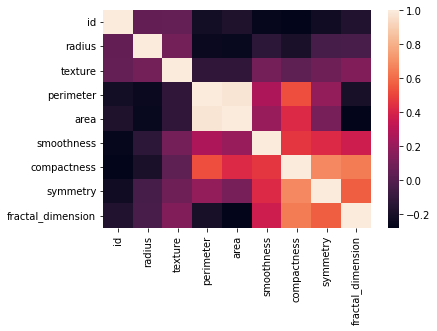

In [4]:
corelations = data.corr()
sns.heatmap(corelations)
print(corelations)

#### Data Visualization
Terms like "malignant" and "benign" are used to describe how tumor cells behave in prostate cancer. Because they are cancerous, malignant tumors have the ability to infect nearby tissues and metastasize to other areas of the body. These tumors may be aggressive, thus immediate treatment is necessary to stop the cancer from spreading. Malignant tumors can form in the prostate gland and its surrounding tissues, which can lead to symptoms like pain in the back, hips, or pelvis, inability to urinate, blood in the urine or semen, and trouble urinating.

On the other hand, benign tumors are not malignant, do not infect nearby tissues, and do not disseminate to other areas of the body. These tumors may exhibit symptoms resembling those of malignant tumors, such as pain in the lower back or pelvis or trouble urinating, but they do not present the same danger of spreading and may exhibit less aggressive development patterns. Benign tumors can form in the prostate gland and be found via normal screenings or assessments for other medical issues in prostate cancer.

It's crucial to remember that not all tumors are 100 percent benign or 100 percent malignant. Tumors can behave in a variety of ways; some may have more aggressive growth patterns and a higher risk of metastasis, while others may be less aggressive and less likely to spread. Tumors may occasionally be labeled as "borderline" or "atypical," indicating that they contain some malignancy-related characteristics but are not definitely malignant.

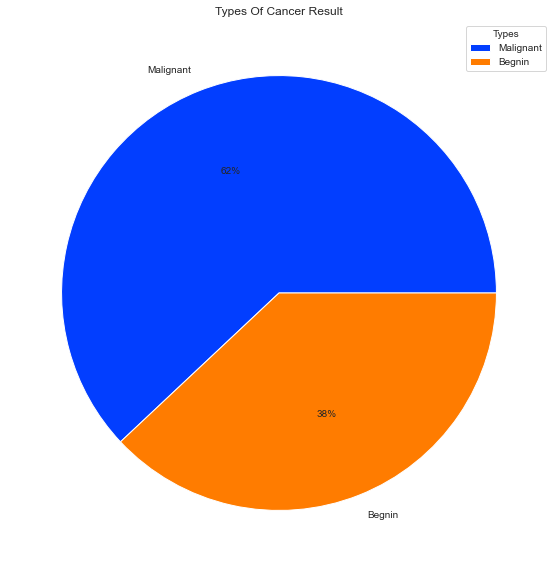

In [33]:
array = [(data['diagnosis_result']=='M').sum(),(data['diagnosis_result']=='B').sum()]
labels = ['Malignant','Begnin']
color = sns.color_palette('bright')
plt.figure(figsize=(10,10))
plt.pie(array,labels=labels, colors = color, autopct='%1.0f%%')
plt.title("Types Of Cancer Result")
plt.legend(title='Types')
plt.show()

Although malignant tumors may need more harsh interventions like surgery, radiation therapy, or chemotherapy, the behavior of a tumor in prostate cancer is ultimately a key component in deciding the best course of treatment. Depending on their size and location, benign tumors may be handled with surveillance or less intrusive procedures. The outcomes for men with prostate cancer can be improved by routine screening and assessment by a healthcare professional, which can aid in the detection and management of malignancies in the prostate gland and surrounding tissues.

In [39]:
def scatter_plot_int(x='Birth_Rate',y='Year'):
    plt.figure(dpi=120)
    plt.title("Types Of Cancer Result")
    plt.legend(title='Types')
    plt.show()
    return plt.scatter(data = data, x=x,y=y)

interact(scatter_plot_int,
        x = widgets.Dropdown(options = ['radius','texture','perimeter','area','smoothness','compactness','symmetry','fractal_dimension']),
        y = widgets.Dropdown(options = ['texture','perimeter','area','radius','smoothness','compactness','symmetry','fractal_dimension']),
        hue = widgets.Dropdown(options = ['diagnosis_result']))

interactive(children=(Dropdown(description='x', options=('radius', 'texture', 'perimeter', 'area', 'smoothness…

<function __main__.scatter_plot_int(x='Birth_Rate', y='Year')>

### Data Preprocessing
By guaranteeing that variables are on a same scale and that the data has a normal distribution, the StandardScaler() preprocessing technique helps to scale and normalize data, which enhances the performance and accuracy of machine learning models.

In [7]:
x = data[['radius','texture','perimeter','area','smoothness','compactness','symmetry','fractal_dimension']]
y = data[['diagnosis_result']]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state =125)

In [8]:
std_sclr = StandardScaler()
x_train = std_sclr.fit_transform(xtrain)
x_test = std_sclr.fit_transform(xtest)

### Data Modeling
#### 1) Logestic Regression 

In [9]:
model1= LogisticRegression(solver='liblinear',C=10.0)
model1.fit(x_train,ytrain)
ypred1=model1.predict(x_test)
print("Predicted value= \n",ypred1)
cm_m1 = confusion_matrix(ytest,ypred1)
print("\n Confusion Matrix =\n",cm_m1)
Ac1 = accuracy_score(ytest,ypred1)*100
print("\nAccurecy=",round(Ac1,3))

Predicted value= 
 ['M' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'M']

 Confusion Matrix =
 [[ 8  3]
 [ 1 18]]

Accurecy= 86.667


#### 2) DecisionTreeClassifier

In [10]:
model2= DecisionTreeClassifier()
model2.fit(x_train,ytrain)
ypred2=model2.predict(x_test)
print("Predicted value= \n",ypred2)
cm_m2 = confusion_matrix(ytest,ypred2)
print("\n Confusion Matrix =\n",cm_m2)
Ac2 = accuracy_score(ytest,ypred2)*100
print("\nAccurecy=",round(Ac2,3))

Predicted value= 
 ['M' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B']

 Confusion Matrix =
 [[ 9  2]
 [ 3 16]]

Accurecy= 83.333


#### 3) support vector machines

In [11]:
model3= svm.SVC()
model3.fit(x_train,ytrain)
ypred3=model3.predict(x_test)
print("Predicted value= \n",ypred2)
cm_m3 = confusion_matrix(ytest,ypred2)
print("\n Confusion Matrix =\n",cm_m2)
Ac3 = accuracy_score(ytest,ypred2)*100
print("\nAccurecy=",round(Ac3,3))

Predicted value= 
 ['M' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B']

 Confusion Matrix =
 [[ 9  2]
 [ 3 16]]

Accurecy= 83.333


### Conclusion
In the above data modeling analysis we have conducted three types of modeling namely linear decision tree and SVM out of which linear modeling gives the maximum accuracy of 86.667% .

Moreover is challenging to pinpoint which tumor characteristic most strongly influences prostate cancer in men because all of these characteristics might offer valuable insight into the diagnosis and management of the condition. The radius, perimeter, and area of the tumor can be used to estimate the stage and extent of the cancer, and the smoothness, compactness, and texture of the tumor cells can reveal information about how aggressive the cancer is. The stage and aggressiveness of the tumour can also be determined by its symmetry and fractal dimension..

In the end, prostate cancer diagnosis and treatment involve a thorough assessment of all available data, including imaging investigations, laboratory testing, and physical exams. Radius, texture, perimeter, area, smoothness, compactness, symmetry, and fractal dimension of the tumor can all be used to make this assessment, which can then be used to inform treatment choices and enhance outcomes for men with prostate cancer. Men should regularly get screened for prostate cancer and talk to their doctor about their risk factors, as early diagnosis and treatment are essential for a better prognosis.